
## Linear Discriminant Analysis

#### Abdulahi Raji
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96/)


### Linear Discriminant Analysis
Linear Discriminant Analysis (LDA) is a statistical method that is used simultaneously for dimensionality reduction and classification. LDA, much like PCA is also a linear transformation method commonly used in dimensionality reduction tasks. However unlike the latter which is an unsupervised learning algorithm, LDA falls into the class of supervised learning methods. The objective of linear discriminant analysis (LDA) is to enhance the distinction between classes by simultaneously minimizing within-class variance and maximizing separability. This is accomplished through the projection of the feature space into a lower dimension and the rotation of principal axes. Notably, this goal bears resemblance to principal component analysis (PCA). However, LDA introduces a crucial distinction by incorporating information about class labels, rendering it a supervised machine learning algorithm. The incorporation of class labels enables LDA to function as a trainable classification algorithm, distinguishing it from the unsupervised nature of PCA.


### Mathematics of LDA
1. Calculate the covariance matrix for each class
2. Calculate the pooled within-group covariance matrix $W = \frac{(na - 1)covA + (nb - 2)covB}{na + nb - 2}$ if there are two classes.
3. Calculate the between-group covariance matrix $B = T - W$ where $T$ is the total covariance matrix
4. Calculate matrix $S = W^{-1} B$
5. Calculate the eigen values and eigen vectors on $S$
6. Sort Eigenvectors by decreasing Eigenvalues, and select the largest Eigenvalue from corresponding Eigenvector.
7. Finally, use the selected eigenvector to compute the discriminant scores.

### Assumptions 
1. The features in each class are normally distributed.
2. Homoscedasticity(Equal Covaraince)
3. The features are statistically independent
4. While normality is assumed within each class, LDA also assumes that the joint distribution of the features across classes is multivariate normal.

### Executive Summary


When confronted with a problem of distinguishing between multiple classes based on a set of features, the problem statement revolves around achieving optimal separation between these classes. LDA offers a solution by identifying linear combinations of features that maximize the variance between classes while minimizing the variance within each class. This technique not only aids in classification but also provides a means for reducing the dimensionality of the feature space, particularly useful when dealing with high-dimensional data. The results obtained from LDA manifest in transformed features, ordered by their discriminative power, allowing for a clearer understanding of class separability.

### Import Packages

In [1]:
import os                                                 # to set current working directory 
import pandas as pd                                       # DataFrames and plotting
import numpy as np                                        # For computing Arrays and Matrixes
import seaborn as sns                                     # for data visualization
import matplotlib.pyplot as plt                           # For plotting
import sklearn                                            # Our modual for ML
from sklearn.model_selection import train_test_split      # split the data into training and testing subsets
from sklearn.preprocessing import StandardScaler, LabelEncoder    # For preprocessing features before training
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importing LDA 
from matplotlib import colors                                     # To import color schemes
cmap = plt.cm.inferno                                     # inferno color map!


### Visualization Function

In [35]:
# The correlation plot was taken from Professor Michael Pyrcz Github repository. 
def plot_corr(dataframe,size=10):                               # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def plot_lda_scatter(lda, X, y):
    transformed_features = lda.transform(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=transformed_features[:, 0], y=[0] * len(transformed_features), hue=y)  # Access only the first dimension
    plt.title('LDA Scatter Plot')
    plt.xlabel('LDA Dimension 1')
    plt.show()

def visualize_classification(model, xfeature, yfeature, target, scaler=None, plot_step=1000, cmap_name='viridis'):
    """
    Visualize the classification results using a contour plot and scatter plot.

    Parameters:
    - model: The classification model to visualize.
    - features: A DataFrame containing the features.
    - target: The target variable (response).
    - scaler: Scaler object for inverse transformation (optional).
    - plot_step: Step size for creating a meshgrid.
    - cmap_name: Name of the colormap to use.

    Returns:
    - A Matplotlib AxesSubplot object.
    """
    # Set up colormap
    cmap = plt.get_cmap(cmap_name)

    # Define plot boundaries
    x_min, x_max = min(xfeature), max(xfeature) 
    y_min, y_max = min(yfeature) , max(yfeature) 

    # Create a meshgrid for contour plot
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, plot_step),
                         np.linspace(y_min, y_max, plot_step))

    # Predict class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Inverse transform to get original feature values
    if scaler:
        trans = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
        trans_x, trans_y = trans[:, 0].reshape(xx.shape), trans[:, 1].reshape(xx.shape)
    else:
        trans_x, trans_y = xx, yy

    # Set up contour plot
    cs = plt.contourf(trans_x, trans_y, Z, cmap=cmap, alpha=0.5)

    # Scatter plot of original data points
    im = plt.scatter(xfeature, yfeature, c=target, cmap=cmap, edgecolors="black", linewidths=0.5)
   
    # Set axis labels and colorbar
    plt.xlabel('Porosity')
    plt.ylabel('Brittle')
    cbar = plt.colorbar(im, orientation='vertical', label='Production')

    return plt.gca()

### Loading Data

This project used the data "unconv_MV_v4.csv" from the GeostatsGuy's Github repository, thanks to Prof. Pyrcz!

I will be working with the following features:

* **Porosity** - storability of the reservoir rock $(fraction)$
* **Permeability** - the ability of a fluid to flow through the rock in $(milidarcy)$
* **Acoustic Impedence** - product of sonic velocity and rock density in unit of $(kg/m^2s*10^3)$
* **Production** - volume of hydrocarbon production per day in $MCFPD$ 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv") # load from Dr. Pyrcz's GitHub repository
df.head(n=4)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854


### Data Preprocessing

Let's remove the well index.

In [4]:
df = df.iloc[:,1:]                                # remove the well index

Checking the summary statistics of the data for any unreasonable data value.

In [5]:
df.describe()

,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,3864.407081
std,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,1553.277558
min,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,839.822063
25%,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,2686.227611
50%,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,3604.303506
75%,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,4752.637555
max,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,8590.384044


Upon examining the summary statistics, anomalies were detected in the form of negative values for total organic carbon(TOC). These values are physically implausible, as the property should be non-negative. Given that the minimum permissible values for the property is 0, we have decided to rectify this issue by truncating any negative values to 0.

To achieve this, I used the `get_numerical_data()` DataFrame member function. This approach allows for the simultaneous application of a simple conditional statement to all data values in the DataFrame, effectively setting any negative values to 0.0.

Additionally, a categorical variable for production was introduced based on a threshold of 3,500 MCFPD (thousand cubic feet per day). This categorization allows for a clear distinction between instances with production levels exceeding the threshold and those below it.
The summary statistics shows that the data values fall within a reasonable range. Let's create a pair-wise scatterplot matrix with histograms along the diagonal to visualise the bivariate plots.

In [21]:
num = df._get_numeric_data()                      # get shallow copy of the numerical values from the DataFrame
num[num < 0] = 0                                  # truncate negative values to 0.0
df['cProd'] = np.where(df['Prod']>=3500, 1, 0)    # conditional statement assign a new feature
df.head(n=4)                                      # calculate summary statistics for the data

,Por,Perm,AI,Brittle,TOC,VR,Prod,cProd
0,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819,0
1,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063,0
2,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259,0
3,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854,1


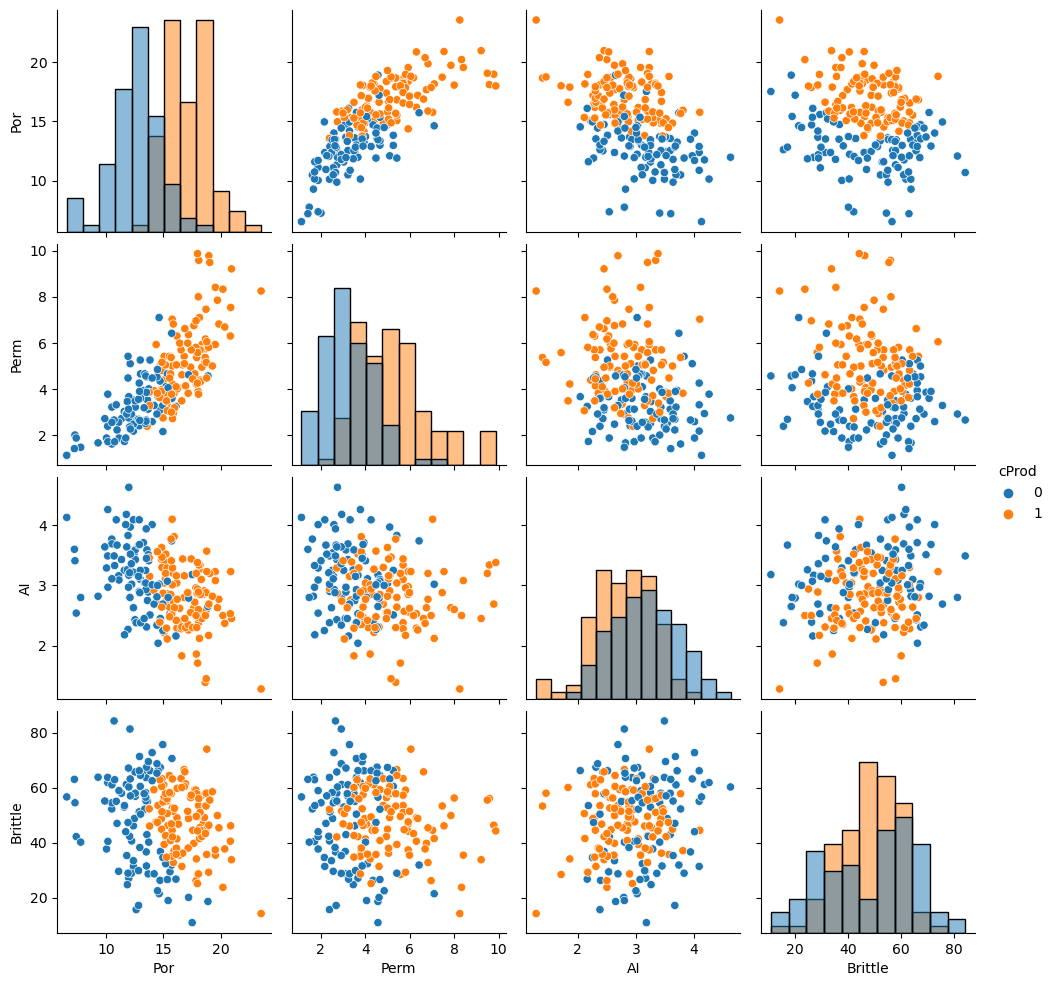

In [22]:
sns.pairplot(df,vars=['Por','Perm','AI', 'Brittle'],markers='o',hue='cProd', diag_kind="hist")

The bivariate plots reveal distinct characteristics in the relationship between various pairs of features within the dataset. Specifically, an examination of the plots highlights that the combination of porosity and brittleness exhibits a homoscedastic relationship, meaning the variability of the data is consistent across different levels of these two variables. This finding aligns with one of the key assumptions of Linear Discriminant Analysis (LDA).

Moreover, both porosity and brittleness showcase a normal distribution within each category, further adhering to LDA's assumptions. The normality of the distributions is a crucial aspect, as LDA assumes that the features follow a Gaussian distribution within each class. Hence, the decision to perform the LDA with porosity and brittleness. 

### Checking the correlation matrix 


In [23]:
corr_matrix = np.corrcoef(df.iloc[:,:7], rowvar = False)  # correlation matrix without the categorical value
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.    0.76 -0.46 -0.22  0.71  0.11  0.88]
 [ 0.76  1.   -0.24 -0.12  0.47  0.05  0.71]
 [-0.46 -0.24  1.    0.13 -0.53  0.5  -0.37]
 [-0.22 -0.12  0.13  1.   -0.21  0.32 -0.02]
 [ 0.71  0.47 -0.53 -0.21  1.    0.3   0.64]
 [ 0.11  0.05  0.5   0.32  0.3   1.    0.23]
 [ 0.88  0.71 -0.37 -0.02  0.64  0.23  1.  ]]


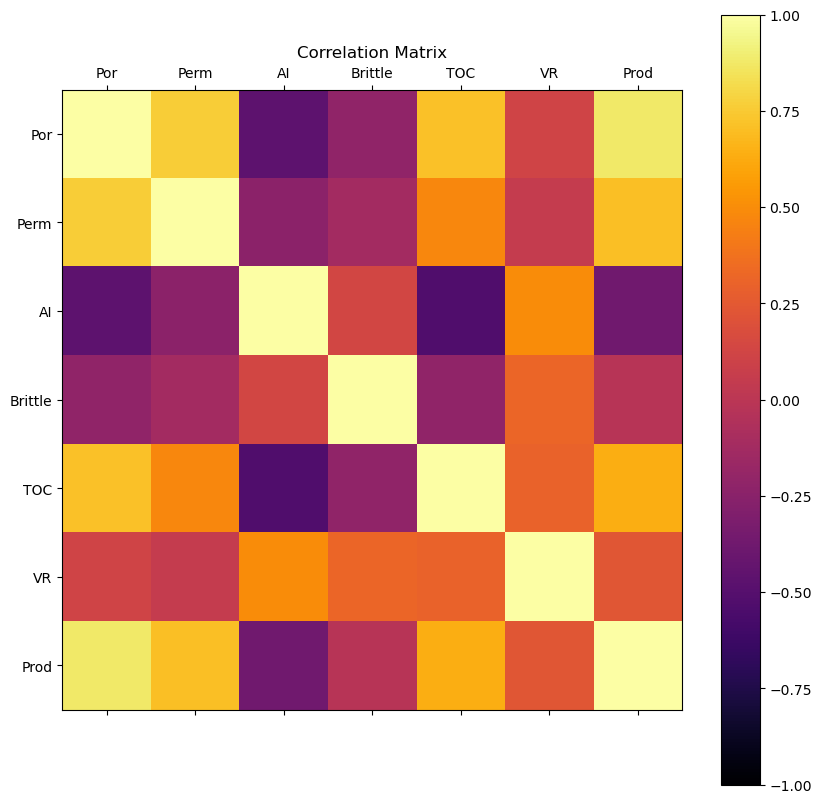

In [24]:
plot_corr(df.iloc[:,:7],10)                            # using our correlation matrix visualization function
plt.show()

The correlation matrix also confirms that porosity and brittleness are not correlated which also conforms with one of the assumptions of LDA. Hence, the decision to perform LDA with porosity and brittleness with low and high production being the classes.

### Train-Test Split

75% of the data were used to train the model parameters to maximize the model’s accuracy while 25% of the data were used to test the model.

In [25]:
df_subset = df.iloc[:,[0,3,7]]                # extract just por, brittle and prod with 200 samples
X_train, X_test, y_train, y_test = train_test_split(df_subset.iloc[:,[0,1]], df_subset.iloc[:,2], test_size=0.25, random_state=73073)
y_train = pd.DataFrame({'cProd':y_train.values})
y_test = pd.DataFrame({'cProd':y_test.values})

Setting the minimum and maximum values for plotting.

In [26]:
x1min = 5.0; x1max = 25.0
x2min = 0.0; x2max = 100.0
ymin = 0.0; ymax = 9000.0

Let's check the univariate distributions of Porosity, Brittleness and Producton.

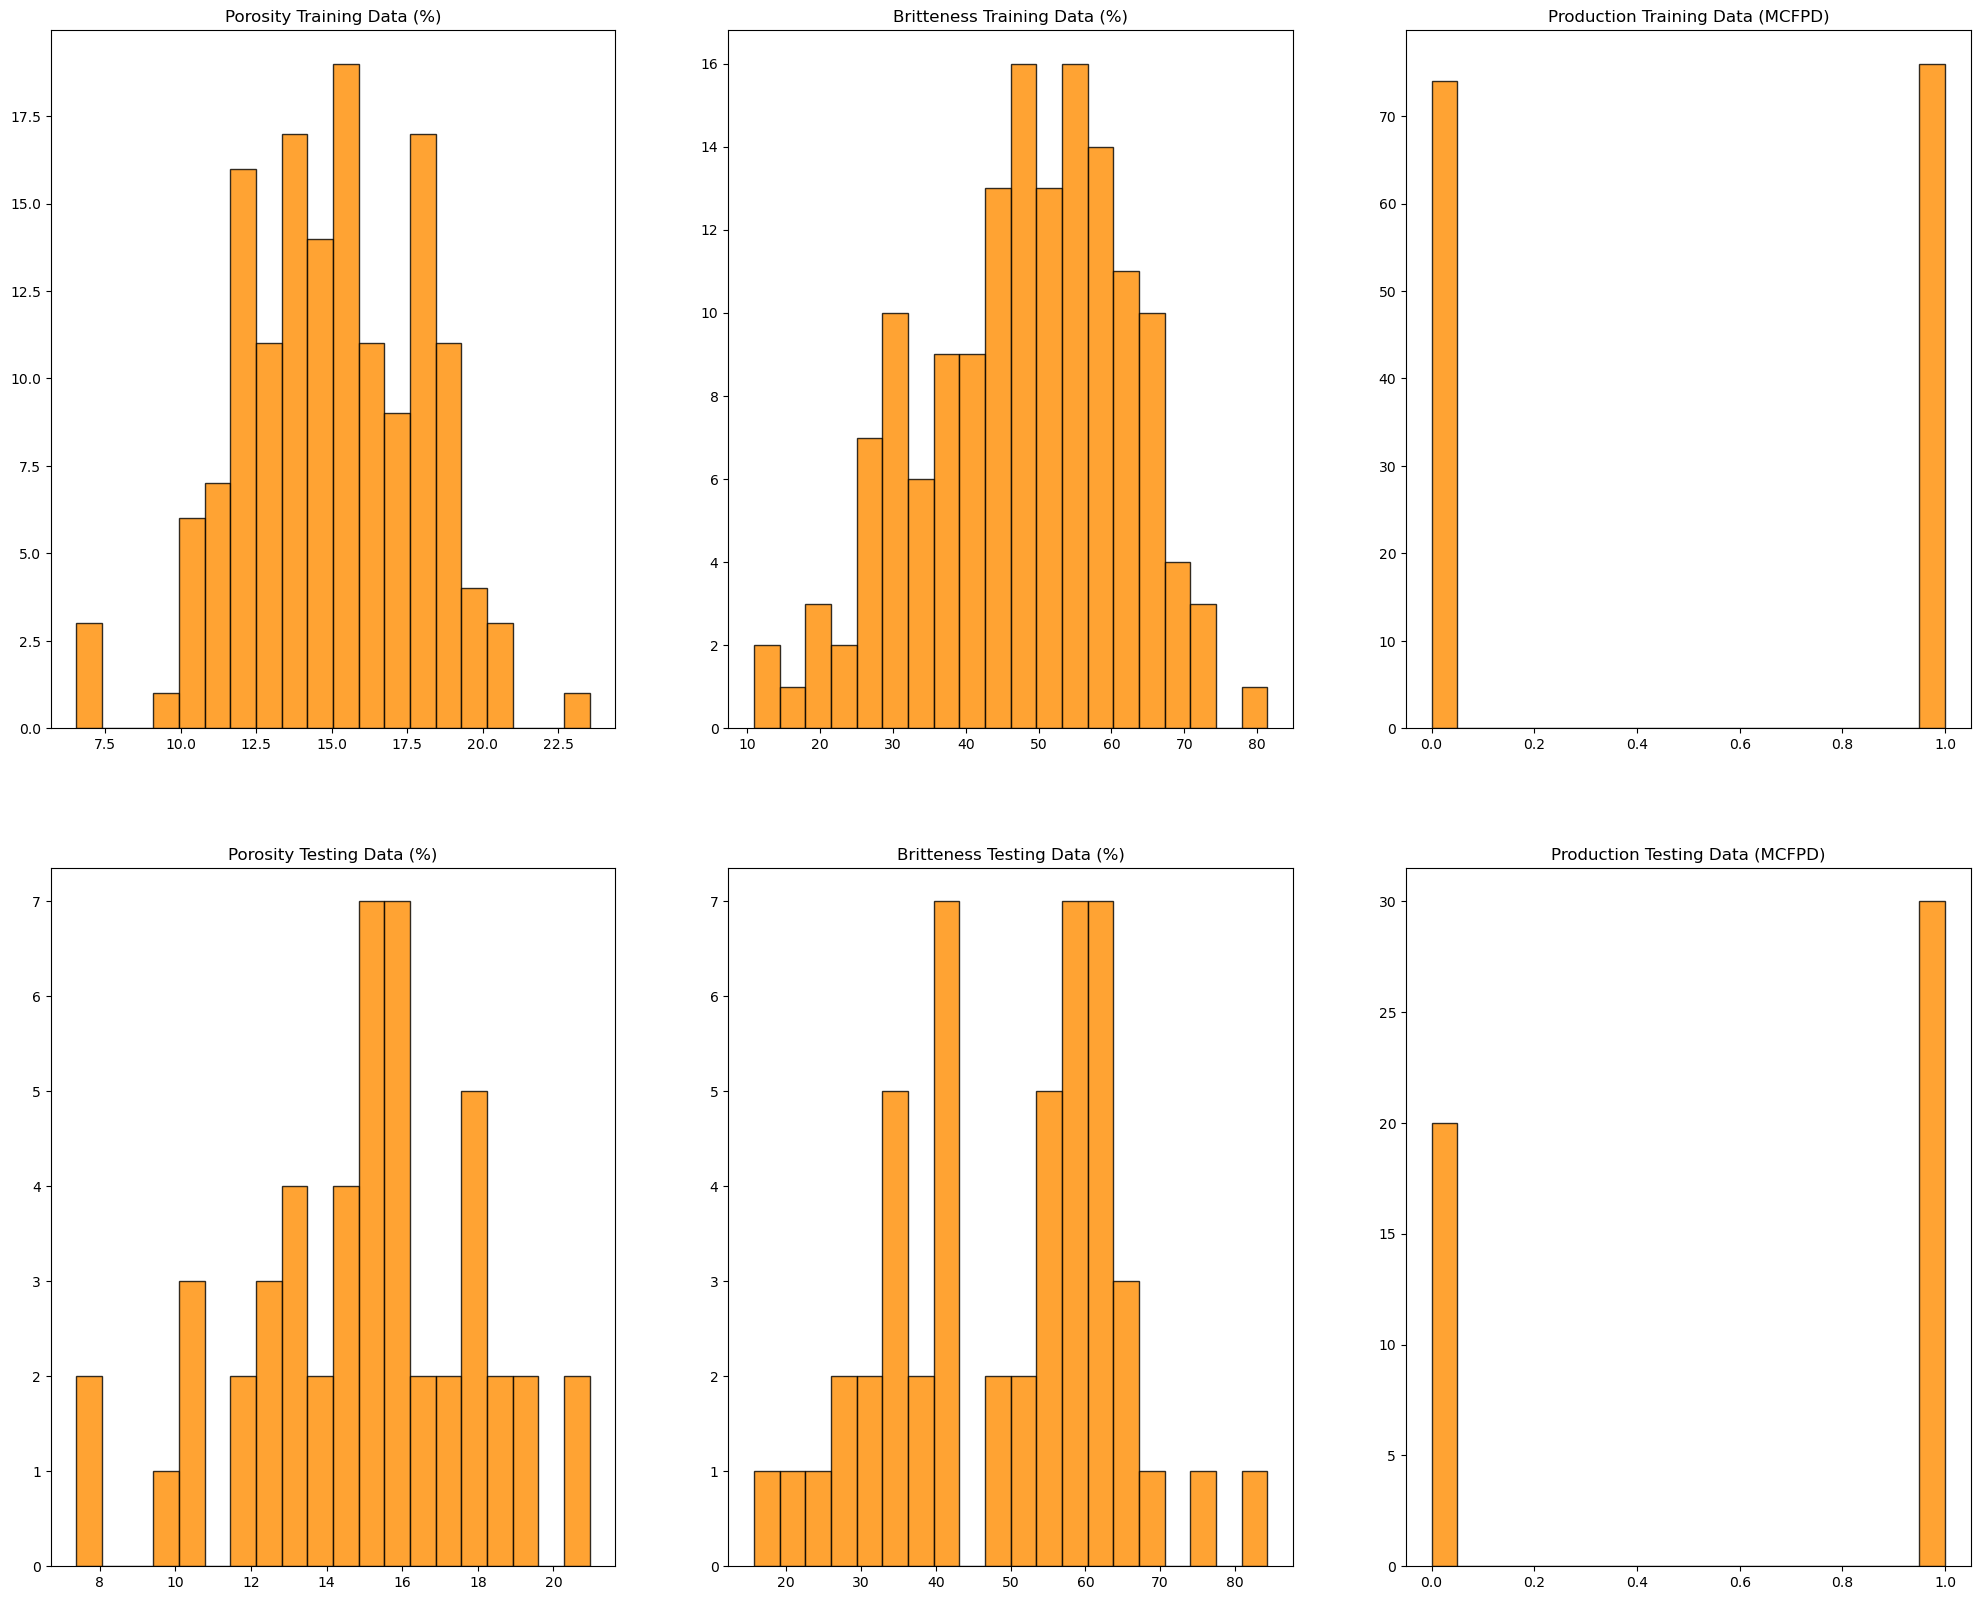

In [27]:
plt.subplot(231)
plt.hist(X_train["Por"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Porosity Training Data (%)')

plt.subplot(232)
plt.hist(X_train["Brittle"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Britteness Training Data (%)')

plt.subplot(233)
plt.hist(y_train['cProd'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Production Training Data (MCFPD)')

plt.subplot(234)
plt.hist(X_test["Por"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Porosity Testing Data (%)')

plt.subplot(235)
plt.hist(X_test["Brittle"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Britteness Testing Data (%)')

plt.subplot(236)
plt.hist(y_test['cProd'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
plt.title('Production Testing Data (MCFPD)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

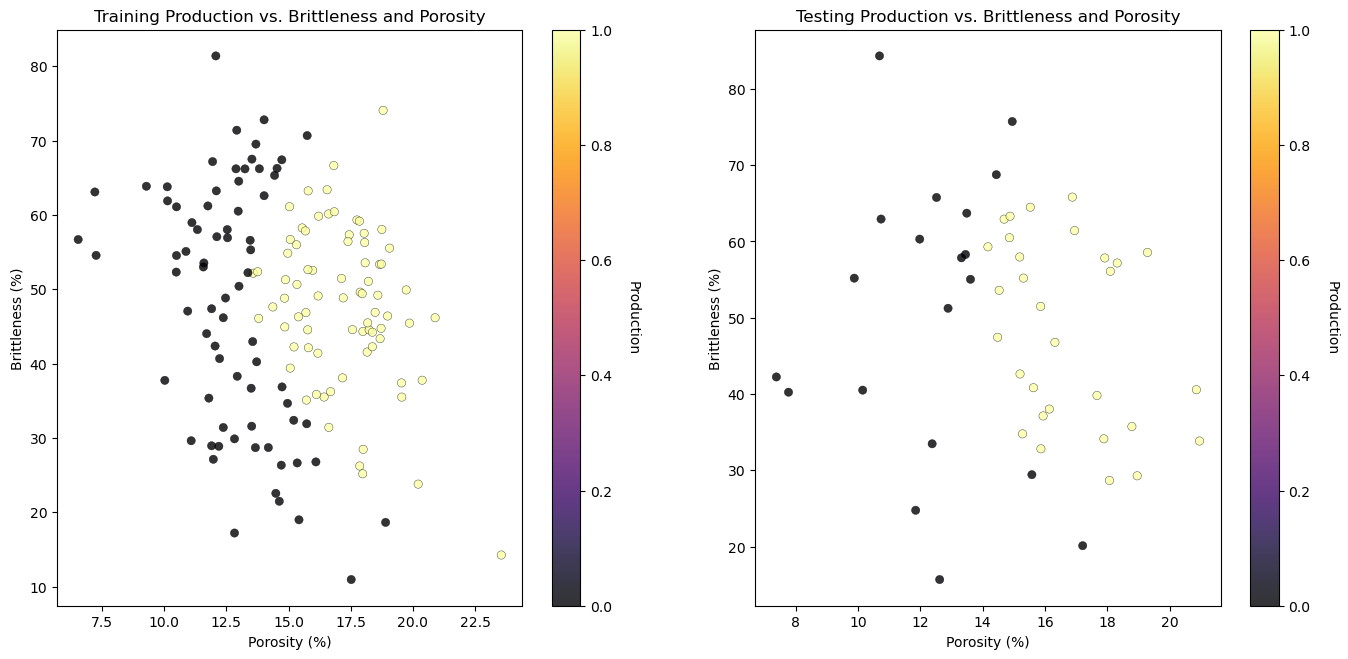

In [32]:
plt.subplot(121)
im = plt.scatter(X_train["Por"],X_train["Brittle"],s=None, c=y_train['cProd'], marker=None, cmap=cmap, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Training Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["Por"],X_test["Brittle"],s=None, c=y_test['cProd'], marker=None, cmap=cmap, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)

plt.show()

### Building an LDA Model

LDA involves computing the mean and covariance matrix of the data. When features have different scales, the contribution of each feature to these calculations can be dominated by the feature with the larger scale. In this project, the porosity and brittleness are both of the same scale (%), hence, there is no need for standardization of the features before applying LDA

In [40]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Create an LDA classifier
X_tf = lda.fit(X_train, y_train.values.ravel()) # Train the classifier

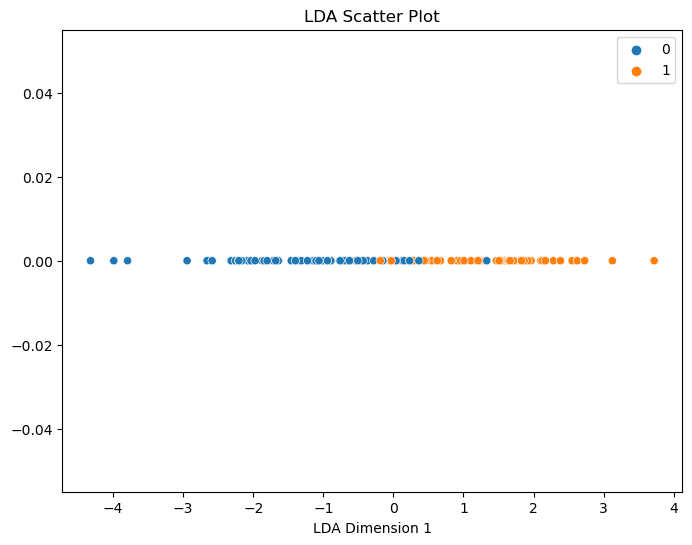

In [41]:
plot_lda_scatter(lda, X_train, y_train.values.ravel())

The one-dimensional Linear Discriminant Analysis (LDA) scatter plot illustrates the effective separation of classes along the LDA dimension, revealing distinct clusters and demonstrating the discriminative power of the selected features.

C:\Users\adisa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Linear Discriminant Analysis')

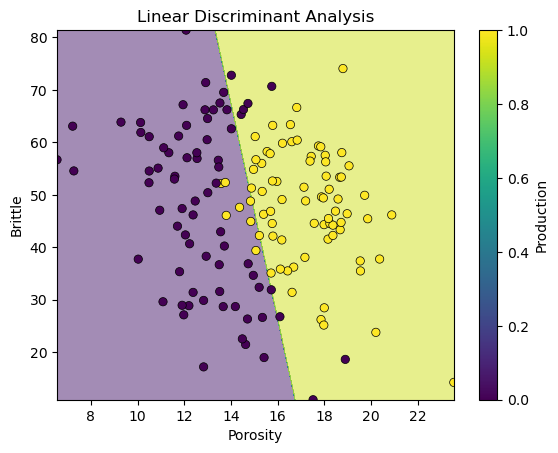

In [43]:
Show_train = visualize_classification(lda, X_train['Por'], X_train['Brittle'], y_train.values.ravel(), scaler=None, plot_step=1000, cmap_name='viridis')
plt.title('Linear Discriminant Analysis')

The Linear Discriminant Analysis (LDA) plot visually presents the decision boundary and class distribution in the porosity and brittleness feature space, demonstrating effective separation between different classes, as indicated by well-defined clusters and distinct regions of influence.

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predictions on the testing set
y_pred = lda.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.89      0.83      0.86        30

    accuracy                           0.84        50
   macro avg       0.83      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50


Confusion Matrix:
[[17  3]
 [ 5 25]]


The accuracy of the Linear Discriminant Analysis (LDA) model on the testing dataset is 0.84, indicating that it correctly predicted the class for 84% of the samples. The classification report provides precision, recall, and F1-score metrics for each class, while the confusion matrix shows the count of true positive, true negative, false positive, and false negative predictions.

C:\Users\adisa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Linear Discriminant Analysis')

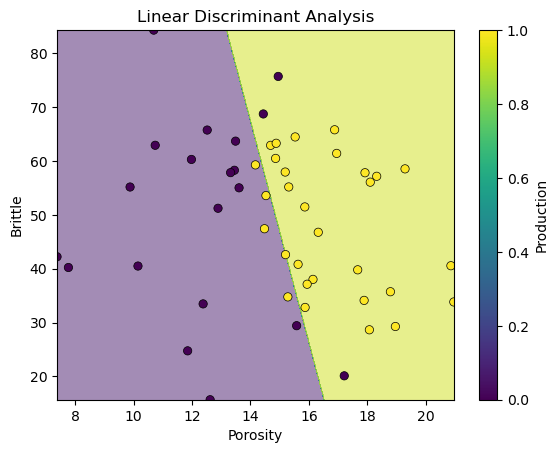

In [42]:
Show_test = visualize_classification(lda, X_test['Por'], X_test['Brittle'], y_test.values.ravel(), scaler=None, plot_step=1000, cmap_name='viridis')
plt.title('Linear Discriminant Analysis')

## Abdulahi Raji, MS Student, University of Texas at Austin

My research interest is carbon capture, utilization and storage. I am currently seeking internship opportunities to collaborate with forward-thinking organizations and industry leaders. You can reach out to me on [LinkedIn](https://www.linkedin.com/in/abdulahiraji/)

I hope this was helpful,

*Abdulahi*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
